#   Descriptive Analysis 

- We initially load the libraries that we will need for the descriptive analysis of the database

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import distplot
from scipy.stats import norm

- We read the file we have built and cleaned up previously.

In [5]:
# Read csv
df = pd.read_excel('/home/dsc/Master-Kschool/TFM/cleanned_data/df.xlsx')

- We take a first look at the data we have available. We observe that the data frame is composed of a total of 13.541.220 data distributed in 451,374 rows and 30 columns.  

In [8]:
# First Look with Sample

df.sample(10)

,PERSONA,SF_AH_CAPTACION_TT,ESTA_CARTERIZADO,CLIENTE_BBP,TIP_GESTOR,GESTOR,CARTERA_PATRON,CODIGO_CARTERA,DIGITAL_3_MESES,CAMINO_DIGITAL,...,EDAD,SEGMENTO_VALOR,SEGMENTO_RECORRIDO,DZ,OFICINA,LP_SEG_VIDA,LP_SEG_ACCIDENT,LP_SEG_MEDICOS,LP_SEG_MULTIRRIES,LP_SEG_AUTO
32707,340684,1.83,SI,NO,ASESOR FINANCIERO,17300,ASESORAMIENTO FINANCIERO,14821,SI,COMPRADOR,...,25,MEDIO,MEDIO RECORRIDO,9,921,0,0,0,0,0
12072,81176,6096.53,SI,NO,ASESOR FINANCIERO,8900,ASESORAMIENTO FINANCIERO,35667,NO,SIN USO,...,82,MEDIO,ALTO RECORRIDO,10,1013,0,0,0,0,0
3335,209418,0.00,SI,NO,ASESOR FINANCIERO,12032,ASESORAMIENTO FINANCIERO,14398,NO,SIN USO,...,47,MEDIO,BAJO RECORRIDO,5,510,0,0,0,0,0
18910,268091,5.26,SI,NO,ASESOR FINANCIERO,24597,ASESORAMIENTO FINANCIERO,14168,NO,SIN USO,...,58,MEDIO,MEDIO RECORRIDO,5,514,0,0,0,0,0
20909,124987,63787.07,SI,NO,ASESOR FINANCIERO,4851,ASESORAMIENTO FINANCIERO,13865,SI,CONSULTIVO,...,74,ALTO,BAJO RECORRIDO,2,216,0,0,0,0,0
3077,13064,152112.35,SI,NO,ASESOR FINANCIERO,2127,ASESORAMIENTO FINANCIERO,12713,SI,CONSULTIVO,...,69,ALTO,BAJO RECORRIDO,3,310,0,0,0,0,0
13069,315299,669.91,SI,NO,ASESOR FINANCIERO,8207,ASESORAMIENTO FINANCIERO,14135,SI,CONSULTIVO,...,46,ALTO,ALTO RECORRIDO,8,815,1,1,0,0,0
31339,381817,4628.85,SI,NO,ASESOR FINANCIERO,34439,ASESORAMIENTO FINANCIERO,37141,SI,CONSULTIVO,...,61,ALTO,MEDIO RECORRIDO,6,621,0,1,0,0,0
32368,430622,21409.53,SI,NO,ASESOR FINANCIERO,17301,ASESORAMIENTO FINANCIERO,15184,SI,TRANSACCIONAL,...,39,MEDIO,ALTO RECORRIDO,7,720,0,0,0,0,0
14999,188118,88240.36,SI,NO,ASESOR FINANCIERO,27287,ASESORAMIENTO FINANCIERO,15405,SI,CONSULTIVO,...,60,ALTO,BAJO RECORRIDO,1,114,0,0,0,1,1


In [9]:
# Data frame columns 

df.columns

Index(['PERSONA', 'SF_AH_CAPTACION_TT', 'ESTA_CARTERIZADO', 'CLIENTE_BBP',
       'TIP_GESTOR', 'GESTOR', 'CARTERA_PATRON', 'CODIGO_CARTERA',
       'DIGITAL_3_MESES', 'CAMINO_DIGITAL', 'SF_FINANCIACION_TT',
       'SF_FONDOS_INVER', 'SF_PLAN_PENSION', 'LP_DOMIC_INGRESOS',
       'LP_TARJ_CREDITO', 'LP_TARJ_REVOLVING', 'LP_REC_LTGA_OTR',
       'LP_OFIC_INTERNET', 'MARCA_BANCA_PERSONAL', 'MARCA_AF_CCTE', 'EDAD',
       'SEGMENTO_VALOR', 'SEGMENTO_RECORRIDO', 'DZ', 'OFICINA', 'LP_SEG_VIDA',
       'LP_SEG_ACCIDENT', 'LP_SEG_MEDICOS', 'LP_SEG_MULTIRRIES',
       'LP_SEG_AUTO'],
      dtype='object')

In [10]:
# Data frame Shape 

df.shape

(451374, 30)

In [11]:
df.count().sum()

13541220

- We check that the data does not contain Nans.  These had been cleaned in our previous step.

In [12]:
# Check for Nans

df.isna().any();

-  We inform ourselves of the type of data contained in the data frame.  We observe that the data needs to be modified.  All columns except the numerical ones of PP-FFII-EDAD-CAPTATION and FINANCING must be categorized as object.  We proceed to change them and check their modification.

In [13]:
# Look at data types

df.dtypes;

In [14]:
# We modify the data

df[['PERSONA','GESTOR', 'CODIGO_CARTERA','LP_DOMIC_INGRESOS','LP_TARJ_CREDITO',
   'LP_TARJ_REVOLVING','LP_REC_LTGA_OTR','LP_OFIC_INTERNET','DZ','OFICINA',
   'LP_SEG_VIDA','LP_SEG_ACCIDENT','LP_SEG_MEDICOS','LP_SEG_MULTIRRIES','LP_SEG_AUTO']] = df[['PERSONA',
   'GESTOR', 'CODIGO_CARTERA','LP_DOMIC_INGRESOS','LP_TARJ_CREDITO',
   'LP_TARJ_REVOLVING','LP_REC_LTGA_OTR','LP_OFIC_INTERNET','DZ','OFICINA',
   'LP_SEG_VIDA','LP_SEG_ACCIDENT','LP_SEG_MEDICOS','LP_SEG_MULTIRRIES','LP_SEG_AUTO']].astype(object);

In [15]:
df.EDAD = df.EDAD.astype(int);

In [16]:
# We confirm the modification

df.dtypes;

##  ===== Structural information  =====

- We start the descriptive analysis by structuring and wanting to put into context all the data in this database. The first column on which all the other data descends is the DZ column (Zone Address). Each DZ is formed by a certain number of offices and these in turn by a certain number of customers.
Each office has a number of Financial Advisors, each with a number of clients within its portfolio.  These clients are owners of financial products such as FFII, PlP, FINANCING, INSURANCE, CARDS, PAYMENTS...etc.



In [17]:
# ========== Total Number of Zone Adresses ==========

df['DZ'].nunique()

11

In [18]:
# ========== Total Number of Offices ==========

df['OFICINA'].nunique()

162

In [19]:
# ========== Total Number of Clients ==========

df['PERSONA'].nunique()

451374

*** Total Number of Offices by Zone Address ***
DZ
1     15
2     13
3     17
4     16
5     17
6     15
7     13
8     11
9     16
10    15
11    14
Name: OFICINA, dtype: int64
 Offices Distribution
 1 DZ con 11 Oficinas / 2 DZ con 13 Oficinas / 1 DZ con 14 Oficinas
 3 DZ con 15 Oficinas / 2 DZ con 16 Oficinas / 2 DZ con 17 Oficinas


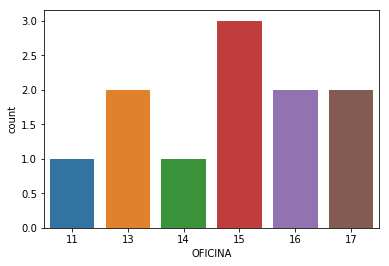

In [20]:
# ========== Total Number of Offices by Zone Address ==========

n_oficinas_por_dz = df.groupby(['DZ'])['OFICINA'].nunique()
print('*** Total Number of Offices by Zone Address ***')
print(n_oficinas_por_dz)
print('===============================================')
print(''' Offices Distribution
 1 DZ con 11 Oficinas / 2 DZ con 13 Oficinas / 1 DZ con 14 Oficinas
 3 DZ con 15 Oficinas / 2 DZ con 16 Oficinas / 2 DZ con 17 Oficinas''')
sns.countplot(n_oficinas_por_dz);

In [21]:
# ========== Total Number of Customers by Zone Address ==========

n_clientes_por_dz = df.groupby(['DZ'])['PERSONA'].nunique()
n_clientes_por_dz

DZ
1     45534
2     35406
3     48081
4     38749
5     51468
6     42198
7     37926
8     21690
9     40227
10    42360
11    47735
Name: PERSONA, dtype: int64